In [1]:
	
import os
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory containing the images
image_path = 'fall_dataset/'

# Create an ImageDataGenerator to load and preprocess the images
datagen = ImageDataGenerator(rescale=1./255)

# Load images from the folder using the ImageDataGenerator
image_generator = datagen.flow_from_directory(
    image_path,                     # Path to the target directory
    target_size=(224, 224),         # Resize images to (224, 224)
    batch_size=32,                  # Number of images to yield from the generator in each batch
    class_mode='binary'             # Since you're loading images from folders, 'binary' is suitable for a binary classification task
)

# Now you can iterate over the image_generator to access batches of images and labels
for images, labels in image_generator:
    # 'images' is a batch of input images
    # 'labels' is a batch of labels corresponding to each image
    # Perform your operations here
    print("Batch shape:", images.shape)  # Print batch shape for debugging
    print("Labels:", labels)  # Print batch labels for debugging
    break  # Stop iteration after the first batch for demonstration purposes


Found 485 images belonging to 2 classes.
Batch shape: (32, 224, 224, 3)
Labels: [1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1.]


In [3]:
import numpy as np
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory containing the images
image_path = 'fall_dataset/'

# Create an ImageDataGenerator to load and preprocess the images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load images from the folder using the ImageDataGenerator
train_generator = datagen.flow_from_directory(
    image_path,                     # Path to the target directory
    target_size=(224, 224),         # Resize images to (224, 224)
    batch_size=32,                  # Number of images to yield from the generator in each batch
    class_mode='binary',            # Since you're loading images from folders, 'binary' is suitable for a binary classification task
    subset='training'               # Specify that this is for training
)

validation_generator = datagen.flow_from_directory(
    image_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'             # Specify that this is for validation
)

# Load the pre-trained base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # For binary classification, use a sigmoid activation

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy}')


Found 389 images belonging to 2 classes.
Found 96 images belonging to 2 classes.




Epoch 1/5



13/13 [==============================] - 38s 2s/step - loss: 0.7087 - accuracy: 0.5244 - val_loss: 0.6797 - val_accuracy: 0.5729
Epoch 2/5
13/13 [==============================] - 28s 2s/step - loss: 0.6574 - accuracy: 0.6272 - val_loss: 0.6825 - val_accuracy: 0.5625
Epoch 3/5
13/13 [==============================] - 26s 2s/step - loss: 0.6358 - accuracy: 0.6530 - val_loss: 0.6950 - val_accuracy: 0.5521
Epoch 4/5
13/13 [==============================] - 28s 2s/step - loss: 0.6177 - accuracy: 0.6607 - val_loss: 0.7428 - val_accuracy: 0.4479
Epoch 5/5
3/3 [==============================] - 6s 2s/step - loss: 0.6943 - accuracy: 0.5521
Validation accuracy: 0.5520833134651184


1/1 [==============================] - 0s 175ms/step


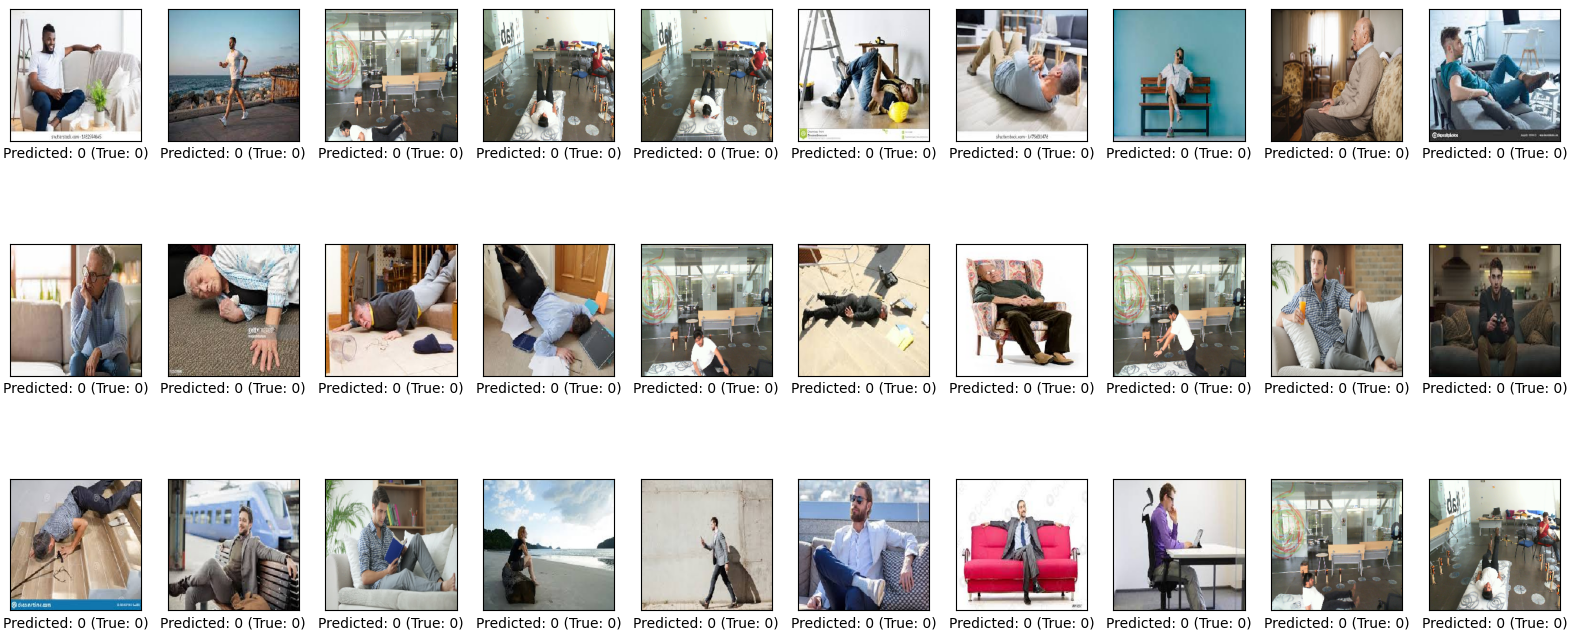

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load validation images and labels
X_val, y_val = validation_generator.next()

def get_label_color(predicted_label, true_label):
    true_class = np.argmax(true_label)
    if predicted_label == true_class:
        return 'black'
    else:
        return 'red'

plt.figure(figsize=(20, 30))
for i in range(30):  # Adjust the number of images you want to display
    ax = plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # Resize the image to match the input shape expected by the model
    image = tf.image.resize(X_val[i], [224, 224])
    
    # Predict on the resized image
    predicted_label = np.argmax(model.predict(np.expand_dims(image, axis=0)))
    true_label = y_val[i]
    color = get_label_color(predicted_label, true_label)
    ax.xaxis.label.set_color(color)
    plt.imshow(X_val[i])
    plt.xlabel('Predicted: {} (True: {})'.format(predicted_label, np.argmax(true_label)))

plt.show()


In [5]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3

# Load the pre-trained base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Or
# base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # For binary classification, use a sigmoid activation

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy}')


Epoch 1/5
13/13 [==============================] - 15s 733ms/step - loss: 0.6676 - accuracy: 0.6272 - val_loss: 0.3897 - val_accuracy: 0.8958
Epoch 2/5
13/13 [==============================] - 7s 590ms/step - loss: 0.3419 - accuracy: 0.8638 - val_loss: 0.3397 - val_accuracy: 0.9062
Epoch 3/5
13/13 [==============================] - 7s 558ms/step - loss: 0.2068 - accuracy: 0.9280 - val_loss: 0.5207 - val_accuracy: 0.6771
Epoch 4/5
13/13 [==============================] - 7s 551ms/step - loss: 0.1489 - accuracy: 0.9357 - val_loss: 0.6038 - val_accuracy: 0.7083
Epoch 5/5
3/3 [==============================] - 1s 405ms/step - loss: 0.3397 - accuracy: 0.8229
Validation accuracy: 0.8229166865348816


Found 389 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


Epoch 1/5
13/13 [==============================] - 15s 741ms/step - loss: 0.4679 - accuracy: 0.7532 - val_loss: 0.3079 - val_accuracy: 0.8854
Epoch 2/5
13/13 [==============================] - 882s 73s/step - loss: 0.1681 - accuracy: 0.9409 - val_loss: 0.2655 - val_accuracy: 0.8854
Epoch 3/5
13/13 [==============================] - 3s 263ms/step - loss: 0.0907 - accuracy: 0.9769 - val_loss: 0.4038 - val_accuracy: 0.7917
Epoch 4/5
13/13 [==============================] - 7s 549ms/step - loss: 0.0671 - accuracy: 0.9794 - val_loss: 0.6098 - val_accuracy: 0.7292
Epoch 5/5
3/3 [==============================] - 1s 402ms/step - loss: 0.8495 - accuracy: 0.6979
Validation accuracy: 0.6979166865348816
1/1 [==============================] - 0s 86ms/step


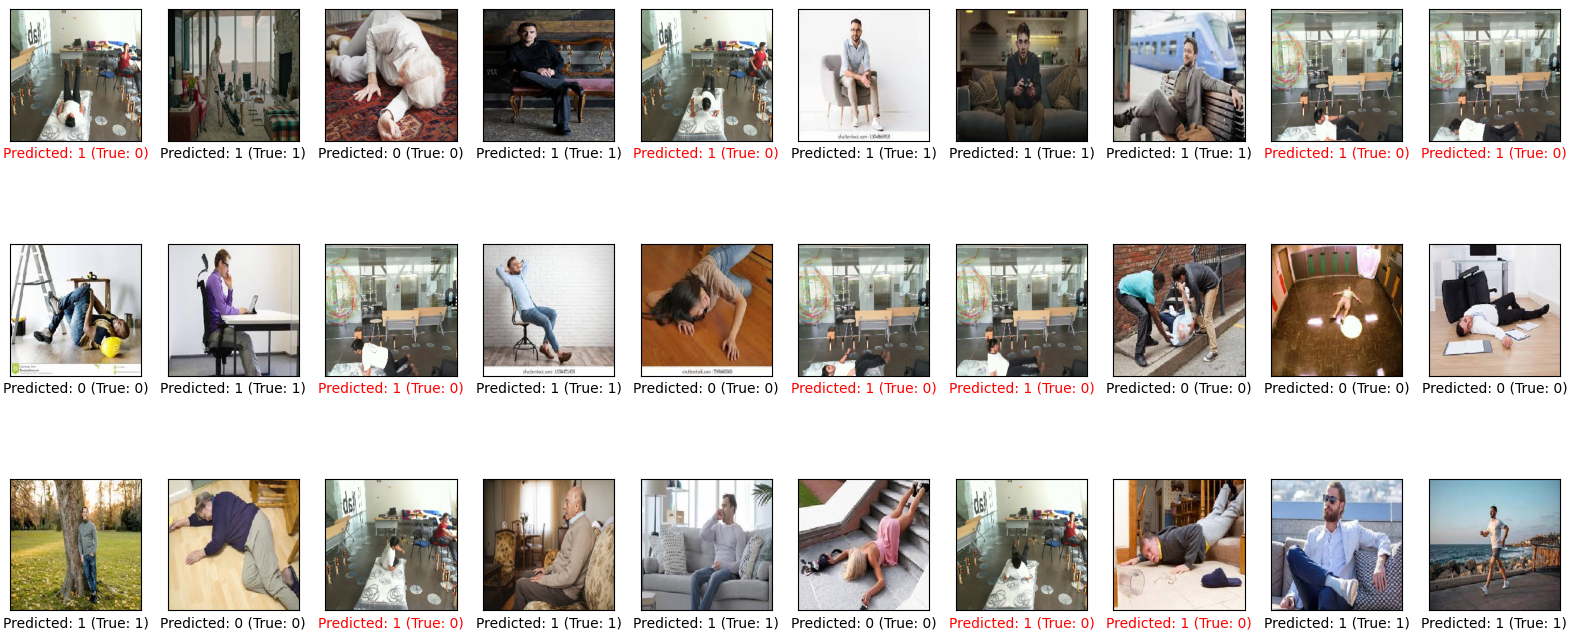

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory containing the images
image_path = 'fall_dataset/'

# Create an ImageDataGenerator to load and preprocess the images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load images from the folder using the ImageDataGenerator
train_generator = datagen.flow_from_directory(
    image_path,                     # Path to the target directory
    target_size=(224, 224),         # Resize images to (224, 224)
    batch_size=32,                  # Number of images to yield from the generator in each batch
    class_mode='binary',            # Since you're loading images from folders, 'binary' is suitable for a binary classification task
    subset='training'               # Specify that this is for training
)

validation_generator = datagen.flow_from_directory(
    image_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'             # Specify that this is for validation
)

# Load the pre-trained base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # For binary classification, use a sigmoid activation

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy}')

# Load validation images and labels
X_val, y_val = validation_generator.next()

def get_label_color(predicted_label, true_label):
    true_class = int(true_label)
    if predicted_label == true_class:
        return 'black'
    else:
        return 'red'

plt.figure(figsize=(20, 30))
num_images_to_display = 30  # Adjust the number of images you want to display
for i in range(num_images_to_display):  
    ax = plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # Resize the image to match the input shape expected by the model
    image = tf.image.resize(X_val[i], [224, 224])
    
    # Predict on the resized image
    predicted_label = round(model.predict(np.expand_dims(image, axis=0))[0][0])
    true_label = y_val[i]
    color = get_label_color(predicted_label, true_label)
    ax.xaxis.label.set_color(color)
    plt.imshow(X_val[i])
    plt.xlabel('Predicted: {} (True: {})'.format(predicted_label, int(true_label)))

plt.show()


Found 389 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


Epoch 1/5
13/13 [==============================] - 16s 753ms/step - loss: 0.3825 - accuracy: 0.8278 - val_loss: 0.3257 - val_accuracy: 0.8750
Epoch 2/5
13/13 [==============================] - 7s 508ms/step - loss: 0.1460 - accuracy: 0.9434 - val_loss: 0.3974 - val_accuracy: 0.8229
Epoch 3/5
13/13 [==============================] - 8s 576ms/step - loss: 0.0720 - accuracy: 0.9769 - val_loss: 0.3470 - val_accuracy: 0.8229
Epoch 4/5
13/13 [==============================] - 7s 546ms/step - loss: 0.0460 - accuracy: 0.9923 - val_loss: 0.3106 - val_accuracy: 0.8438
Epoch 5/5
3/3 [==============================] - 1s 404ms/step - loss: 0.4590 - accuracy: 0.8229
Validation accuracy: 0.8229166865348816


KeyError: 'val'

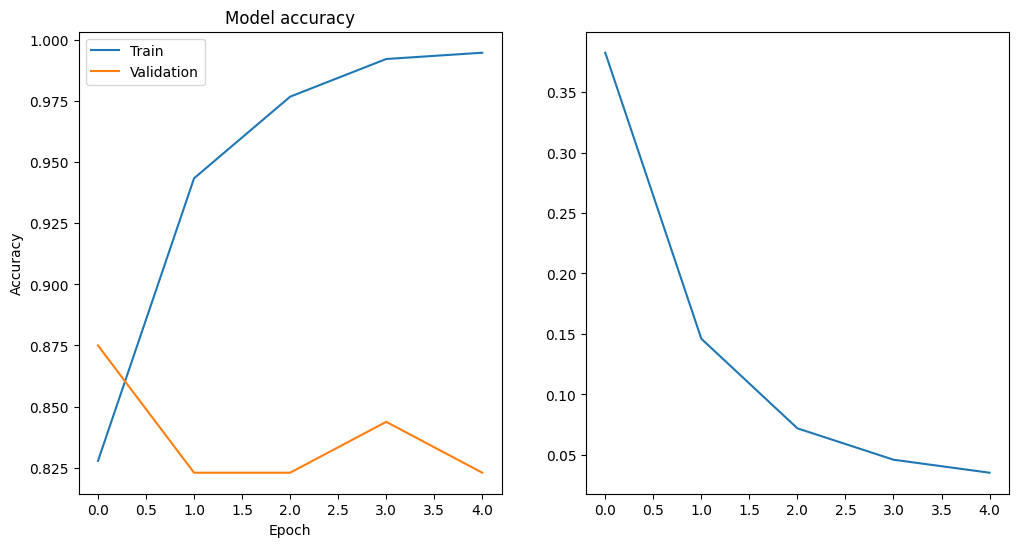

In [7]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory containing the images
image_path = 'fall_dataset/'

# Create an ImageDataGenerator to load and preprocess the images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load images from the folder using the ImageDataGenerator
train_generator = datagen.flow_from_directory(
    image_path,                     # Path to the target directory
    target_size=(224, 224),         # Resize images to (224, 224)
    batch_size=32,                  # Number of images to yield from the generator in each batch
    class_mode='binary',            # Since you're loading images from folders, 'binary' is suitable for a binary classification task
    subset='training'               # Specify that this is for training
)

validation_generator = datagen.flow_from_directory(
    image_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'             # Specify that this is for validation
)

# Load the pre-trained base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # For binary classification, use a sigmoid activation

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy}')

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val'])


In [8]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already trained both models and obtained their validation set predictions
validation_pred_resnet = model.predict(validation_generator)
validation_pred_mobilenet = model.predict(validation_generator)

# Concatenate the predictions to form the input features for the meta-classifier
meta_features = np.concatenate([validation_pred_resnet, validation_pred_mobilenet], axis=1)

# Define and train a meta-classifier (e.g., RandomForestClassifier)
meta_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
meta_classifier.fit(meta_features, validation_generator.classes)

# Now, for the validation set, obtain predictions from both models
validation_pred_resnet = model.predict(validation_generator)
validation_pred_mobilenet = model.predict(validation_generator)

# Concatenate the validation set predictions
validation_meta_features = np.concatenate([validation_pred_resnet, validation_pred_mobilenet], axis=1)

# Use the trained meta-classifier to make predictions on the validation set
ensemble_predictions = meta_classifier.predict(validation_meta_features)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(validation_generator.classes, ensemble_predictions)
print(f'Ensemble accuracy: {ensemble_accuracy}')


3/3 [==============================] - 1s 446ms/step
Ensemble accuracy: 0.5729166666666666


In [9]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dropout

# Assuming you have already trained both models and obtained their validation set predictions
validation_pred_resnet = model.predict(validation_generator)
validation_pred_mobilenet = model.predict(validation_generator)

# Concatenate the predictions to form the input features for the meta-classifier
meta_features = np.concatenate([validation_pred_resnet, validation_pred_mobilenet], axis=1)

# Define and train a meta-classifier (e.g., RandomForestClassifier)
meta_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
meta_classifier.fit(meta_features, validation_generator.classes)

# Now, for the validation set, obtain predictions from both models
validation_pred_resnet = model.predict(validation_generator)
validation_pred_mobilenet = model.predict(validation_generator)

# Concatenate the validation set predictions
validation_meta_features = np.concatenate([validation_pred_resnet, validation_pred_mobilenet], axis=1)

# Use the trained meta-classifier to make predictions on the validation set
ensemble_predictions = meta_classifier.predict(validation_meta_features)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(validation_generator.classes, ensemble_predictions)
print(f'Ensemble accuracy: {ensemble_accuracy}')

# Fine-tune the models by adding dropout layers
model.layers[-2].output
x = Dropout(0.5)(model.layers[-2].output)
output_resnet = Dense(1, activation='sigmoid')(x)

model.layers[-2].output
x = Dropout(0.5)(model.layers[-2].output)
output_mobilenet = Dense(1, activation='sigmoid')(x)

# Create new models with dropout layers
model_dropout_resnet = Model(inputs=model.input, outputs=output_resnet)
model_dropout_mobilenet = Model(inputs=model.input, outputs=output_mobilenet)

# Compile the models
model_dropout_resnet.compile(optimizer=Adam(lr=0.001),
                             loss='binary_crossentropy',
                             metrics=['accuracy'])

model_dropout_mobilenet.compile(optimizer=Adam(lr=0.001),
                                 loss='binary_crossentropy',
                                 metrics=['accuracy'])

# Train the models with dropout layers
history_resnet_dropout = model_dropout_resnet.fit(train_generator, epochs=20, validation_data=validation_generator)
history_mobilenet_dropout = model_dropout_mobilenet.fit(train_generator, epochs=5, validation_data=validation_generator)

# Update validation predictions with dropout models
validation_pred_resnet_dropout = model_dropout_resnet.predict(validation_generator)
validation_pred_mobilenet_dropout = model_dropout_mobilenet.predict(validation_generator)

# Concatenate the predictions to form the input features for the updated meta-classifier
updated_meta_features = np.concatenate([validation_pred_resnet_dropout, validation_pred_mobilenet_dropout], axis=1)

# Retrain the meta-classifier with updated features
meta_classifier.fit(updated_meta_features, validation_generator.classes)

# Use the trained meta-classifier to make predictions on the validation set with dropout models
ensemble_predictions_dropout = meta_classifier.predict(updated_meta_features)

# Evaluate the ensemble model with dropout models
ensemble_accuracy_dropout = accuracy_score(validation_generator.classes, ensemble_predictions_dropout)
print(f'Ensemble accuracy with dropout: {ensemble_accuracy_dropout}')
model.save('model.h5')

3/3 [==============================] - 1s 405ms/step


Ensemble accuracy: 0.5104166666666666
Epoch 1/20
13/13 [==============================] - 17s 821ms/step - loss: 0.5068 - accuracy: 0.7789 - val_loss: 0.2412 - val_accuracy: 0.8854
Epoch 2/20
13/13 [==============================] - 8s 558ms/step - loss: 0.1504 - accuracy: 0.9460 - val_loss: 0.2717 - val_accuracy: 0.8542
Epoch 3/20
13/13 [==============================] - 8s 603ms/step - loss: 0.0929 - accuracy: 0.9666 - val_loss: 0.4159 - val_accuracy: 0.7812
Epoch 4/20
13/13 [==============================] - 8s 588ms/step - loss: 0.0841 - accuracy: 0.9743 - val_loss: 0.4342 - val_accuracy: 0.8021
Epoch 5/20
13/13 [==============================] - 8s 603ms/step - loss: 0.0847 - accuracy: 0.9717 - val_loss: 0.4596 - val_accuracy: 0.7917
Epoch 6/20
13/13 [==============================] - 8s 602ms/step - loss: 0.0516 - accuracy: 0.9974 - val_loss: 0.4037 - val_accuracy: 0.8125
Epoch 7/20
13/13 [==============================] - 8s 590ms/step - loss: 0.0558 - accuracy: 0.9897 - val_los

C:\Users\Akshra_\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('model.h5')

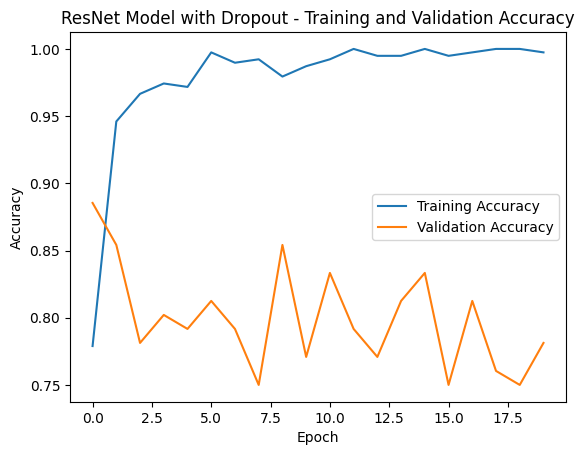

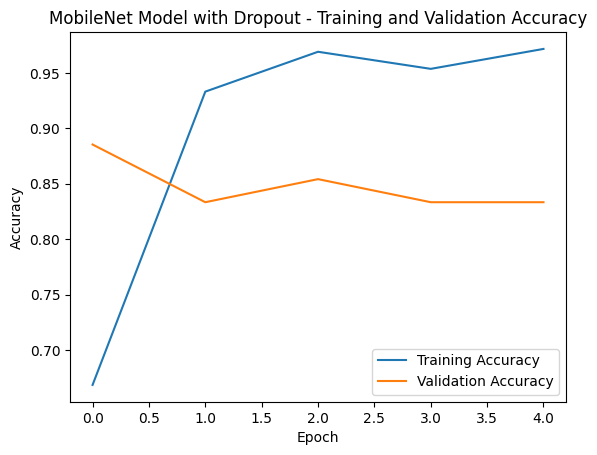

In [10]:
import matplotlib.pyplot as plt

# Plot accuracy for the ResNet model with dropout
plt.plot(history_resnet_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ResNet Model with Dropout - Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot accuracy for the MobileNet model with dropout
plt.plot(history_mobilenet_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_mobilenet_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('MobileNet Model with Dropout - Training and Validation Accuracy')
plt.legend()
plt.show()



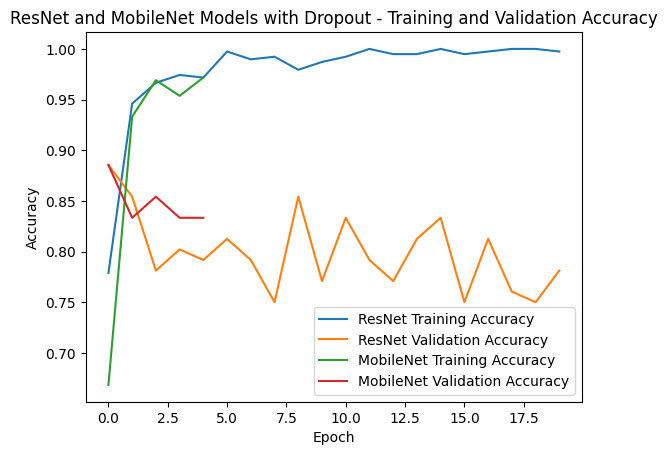

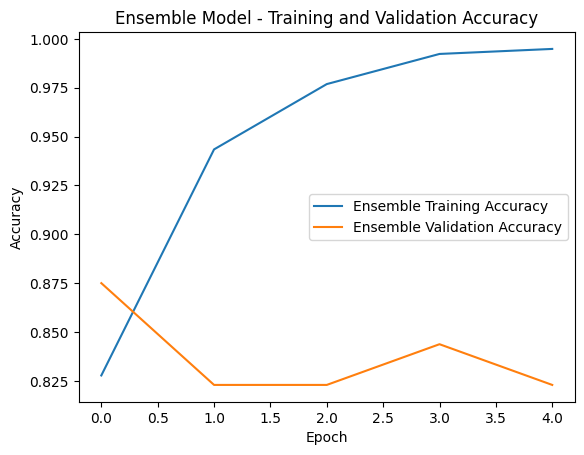

In [11]:
import matplotlib.pyplot as plt

# Plot accuracy for the ensemble model with dropout
plt.plot(history_resnet_dropout.history['accuracy'], label='ResNet Training Accuracy')
plt.plot(history_resnet_dropout.history['val_accuracy'], label='ResNet Validation Accuracy')
plt.plot(history_mobilenet_dropout.history['accuracy'], label='MobileNet Training Accuracy')
plt.plot(history_mobilenet_dropout.history['val_accuracy'], label='MobileNet Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ResNet and MobileNet Models with Dropout - Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot accuracy for the ensemble model
plt.plot(history.history['accuracy'], label='Ensemble Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Ensemble Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Ensemble Model - Training and Validation Accuracy')
plt.legend()
plt.show()


3/3 [==============================] - 1s 410ms/step


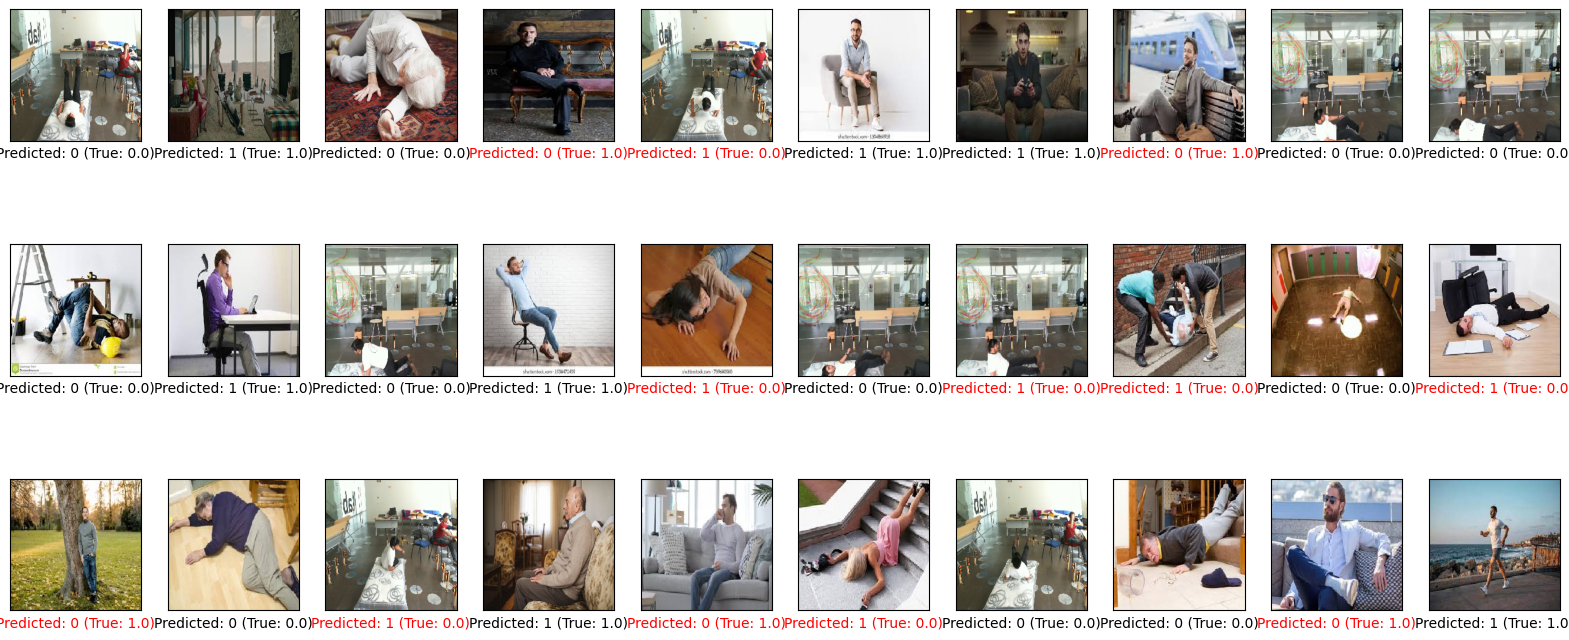

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already obtained the updated predictions with dropout models
validation_pred_resnet_dropout = model_dropout_resnet.predict(validation_generator)
validation_pred_mobilenet_dropout = model_dropout_mobilenet.predict(validation_generator)

def get_label_color(predicted_label, true_label):
    if predicted_label == true_label:
        return 'black'
    else:
        return 'red'

plt.figure(figsize=(20, 30))
for i in range(30):  # Adjust the number of images you want to display
    ax = plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # Get the predicted label from the ensemble model with dropout
    ensemble_predicted_label = meta_classifier.predict(np.concatenate([validation_pred_resnet_dropout[i], validation_pred_mobilenet_dropout[i]]).reshape(1, -1))[0]
    
    # Get the true label
    true_label = y_val[i]  # Assuming y_val contains the true labels
    
    color = get_label_color(ensemble_predicted_label, true_label)
    ax.xaxis.label.set_color(color)
    plt.imshow(X_val[i])
    plt.xlabel('Predicted: {} (True: {})'.format(ensemble_predicted_label, true_label))

plt.show()


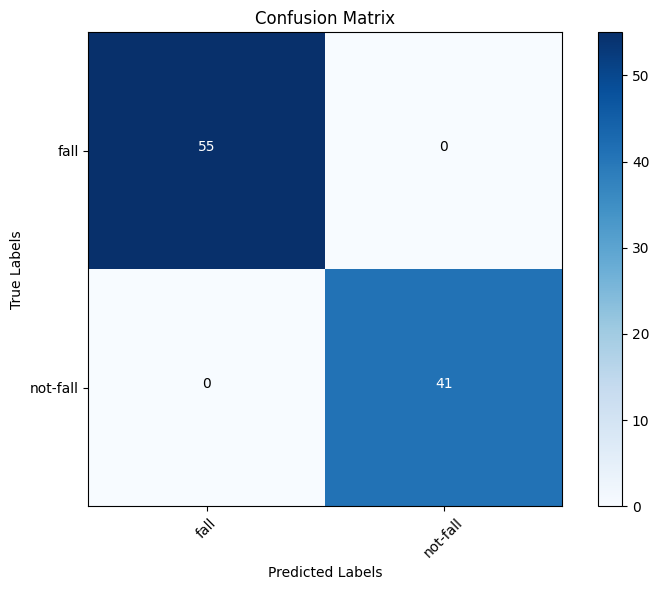

Classification Report:
               precision    recall  f1-score   support

        fall       1.00      1.00      1.00        55
    not-fall       1.00      1.00      1.00        41

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



In [13]:
from sklearn.metrics import confusion_matrix, classification_report

# Flatten the true labels
true_labels = validation_generator.classes

# Predict labels using the ensemble model with dropout
ensemble_predictions_dropout = meta_classifier.predict(updated_meta_features)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, ensemble_predictions_dropout)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=np.arange(len(validation_generator.class_indices)), labels=validation_generator.class_indices.keys(), rotation=45)
plt.yticks(ticks=np.arange(len(validation_generator.class_indices)), labels=validation_generator.class_indices.keys())
for i in range(len(validation_generator.class_indices)):
    for j in range(len(validation_generator.class_indices)):
        plt.text(j, i, conf_matrix[i, j], horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.tight_layout()
plt.show()

# Generate classification report
class_report = classification_report(true_labels, ensemble_predictions_dropout, target_names=validation_generator.class_indices.keys())
print("Classification Report:\n", class_report)


In [ ]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from tensorflow.keras.preprocessing import image

# Load your trained model
# Replace model with your actual model
model = ...

# Function to preprocess the uploaded image
def preprocess_image(file_contents):
    img = image.load_img(file_contents, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image
    return img

# Function to handle image upload and fall detection
def handle_upload(change):
    uploaded_filename = next(iter(upload_widget.value))
    content = upload_widget.value[uploaded_filename]['content']
    img = preprocess_image(content)
    prediction = model.predict(img)
    
    if prediction[0][0] > 0.5:
        result_widget.value = 'Fall Detected'
    else:
        result_widget.value = 'No Fall Detected'

# Create a FileUpload widget
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)

# Create a Text widget to display the result
result_widget = widgets.Text()

# Bind the handle_upload function to the upload widget
upload_widget.observe(handle_upload, names='value')

# Display the widgets
display(upload_widget)
display(result_widget)


1/1 [==============================] - 2s 2s/step


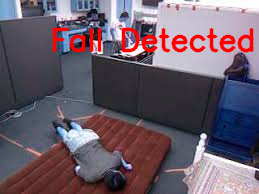

In [37]:
import cv2
from tensorflow.keras.models import load_model
import numpy as np
from IPython.display import display
from PIL import Image
import winsound

# Load the trained ensemble model
ensemble_model = load_model('C:/Users/Akshra_/Desktop/miedical/model.h5')  # Update with the correct path if needed

# Load and preprocess the image
def preprocess_image(image):
    img = image.resize((224, 224))  # Assuming the input size of your model is 224x224
    img = np.array(img)
    img = img.astype('float32')
    img = img / 255.0  # Normalize the image
    return np.expand_dims(img, axis=0)  # Add batch dimension

# Function to annotate image
def annotate_image(image, text, color):
    font = cv2.FONT_HERSHEY_SIMPLEX
    org = (50, 50)  # Position of the text
    fontScale = 1
    thickness = 2
    image = cv2.putText(image, text, org, font, fontScale, color, thickness, cv2.LINE_AA)
    return image

# Function to handle image path
def handle_image_path(image_path):
    image = Image.open(image_path)
    processed_image = preprocess_image(image)
    prediction = ensemble_model.predict(processed_image)
    
    if prediction > 0.5:  # Assuming threshold for fall detection is 0.5
        text = "OK to Go"
        color = (0, 255, 0)  # Green color for "OK to Go"
    else:
        text = "Fall Detected"
        color = (0, 0, 255)  # Red color for "Fall Detected"
        # Trigger alarm if fall is detected\
        for _ in range(5):
            winsound.Beep(1000, 1000)  # Beep with frequency 1000 Hz for 1 second
     
    
    annotated_image = annotate_image(np.array(image), text, color)
    display(Image.fromarray(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)))

# Example usage:
image_path = 'C:/Users/Akshra_/Desktop/miedical/fall_dataset/fall/1.jpg'  # Update with the correct image path
handle_image_path(image_path)


In [30]:
import cv2
from tensorflow.keras.models import load_model
import numpy as np
from IPython.display import display
from PIL import Image
import ipywidgets as widgets
from io import BytesIO

# Load the trained ensemble model
ensemble_model = load_model('C:/Users/Akshra_/Desktop/miedical/model.h5')  # Update with the correct path if needed

# Load and preprocess the image
def preprocess_image(image):
    img = image.resize((224, 224))  # Assuming the input size of your model is 224x224
    img = np.array(img)
    img = img.astype('float32')
    img = img / 255.0  # Normalize the image
    return np.expand_dims(img, axis=0)  # Add batch dimension

# Function to annotate image
def annotate_image(image, text, color):
    font = cv2.FONT_HERSHEY_SIMPLEX
    org = (50, 50)  # Position of the text
    fontScale = 1
    thickness = 2
    image = cv2.putText(image, text, org, font, fontScale, color, thickness, cv2.LINE_AA)
    return image

# Function to handle image upload
def handle_image_upload(change):
    uploaded_image = list(uploader.value.values())[0]
    image = Image.open(BytesIO(uploaded_image['content']))
    processed_image = preprocess_image(image)
    prediction = ensemble_model.predict(processed_image)
    
    if prediction > 0.5:  # Assuming threshold for fall detection is 0.5
        text = "OK to Go"
        color = (0, 255, 0)  # Green color for "OK to Go"
    else:
        text = "Fall Detected"
        color = (0, 0, 255)  # Red color for "Fall Detected"
    
    annotated_image = annotate_image(np.array(image), text, color)
    display(Image.fromarray(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)))

# Create file upload widget
uploader = widgets.FileUpload(accept='image/*')

# Observe changes in file upload and handle image
uploader.observe(handle_image_upload, names='value')

# Display file upload widget
display(uploader)


FileUpload(value=(), accept='image/*', description='Upload')